# Trabalho Prático 01 - CSI457


---


Thaís Fernandes Aguiar - 22.1.8975

André Lucas Santos - 20.2.8106

Júlia Roberta Gomes Miguel - 20.2.8165


---



# Introdução

Descrição do Problema

O problema apresentado é um típico exemplo de "problema de alocação de horários escolares". O objetivo é organizar um conjunto de aulas, turmas, professores e salas de aula de forma que todas as aulas sejam alocadas sem conflitos, respeitando uma série de restrições. Cada aula deve ser ministrada por um professor específico, em uma determinada sala, para uma turma específica.

Restrições Consideradas


*   Aulas não podem ser simultâneas para um mesmo professor.
*   Aulas não podem ser simultâneas para uma mesma turma.
*   Cada sala deve ter apenas uma aula por vez.

Alocação de Recursos:

As aulas devem ser atribuídas às salas disponíveis, garantindo que cada sala esteja equipada e disponível para a aula planejada.
Deve-se garantir que a distribuição de aulas e professores seja feita de forma que não haja sobrecarga de trabalho em um professor ou sala específica.

Exemplo de Dados problema de horários escolares.

| Aula         | Turma   | Professor | Sala     |
|--------------|---------|-----------|----------|
| Matemática   | 1º Ano  | Prof. A   | Sala 101 |
| Física       | 1º Ano  | Prof. B   | Sala 102 |
| Química      | 2º Ano  | Prof. C   | Sala 103 |
| Biologia     | 2º Ano  | Prof. D   | Sala 104 |
| História     | 3º Ano  | Prof. E   | Sala 105 |
| Geografia    | 3º Ano  | Prof. F   | Sala 106 |


Objetivo

Desenvolver um algoritmo que possa alocar essas aulas, turmas, professores e salas de forma a maximizar a utilização dos recursos (salas e professores) enquanto minimiza conflitos de horário. Além disso, o sistema deve garantir que todas as aulas sejam devidamente distribuídas sem sobreposição de recursos.

Esse problema é frequentemente abordado com técnicas de otimização, como algoritmos genéticos, programação linear, ou outros métodos de pesquisa operacional, para encontrar a melhor solução possível, dada as restrições e objetivos.

In [ ]:
# Instruções para instalar bibliotecas necessárias
!pip install matplotlib pandas scipy

# Importação das bibliotecas necessárias
import random
from scipy import special as sc
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

# Definindo as constantes e parâmetros do experimento
NUM_AULAS = 6            # Número de aulas a serem alocadas
NUM_TURMAS = 3           # Número de turmas diferentes
POPULATION_SIZE = 10     # Tamanho da população inicial de soluções
MIXING_NUMBER = 2        # Número de pais selecionados para crossover
MUTATION_RATE = 0.05     # Taxa de mutação para alterar aleatoriamente a solução
MAX_GENERATIONS = 600  # Limita o número de gerações para evitar loops infinitos

In [25]:
# Definição das aulas, professores e turmas
aulas = [
    ("Matemática", "1º Ano", "Prof. A"),
    ("Física", "1º Ano", "Prof. B"),
    ("Química", "1º Ano", "Prof. C"),
    ("Biologia", "1º Ano", "Prof. D"),
    ("História", "1º Ano", "Prof. E"),
    ("Geografia", "1º Ano", "Prof. F"),
    ("Matemática", "2º Ano", "Prof. A"),
    ("Física", "2º Ano", "Prof. B"),
    ("Química", "2º Ano", "Prof. C"),
    ("Biologia", "2º Ano", "Prof. D"),
    ("História", "2º Ano", "Prof. E"),
    ("Geografia", "2º Ano", "Prof. F"),
    ("Matemática", "3º Ano", "Prof. A"),
    ("Física", "3º Ano", "Prof. B"),
    ("Química", "3º Ano", "Prof. C"),
    ("Biologia", "3º Ano", "Prof. D"),
    ("História", "3º Ano", "Prof. E"),
    ("Geografia", "3º Ano", "Prof. F")
]

# Definindo as salas disponíveis
salas = ["Sala 101", "Sala 102", "Sala 103", "Sala 104", "Sala 105", "Sala 106"]


In [26]:
# Função de aptidão para avaliar a qualidade de uma solução
def fitness_score(seq):
    """
    Avalia a qualidade de uma solução (seq) de alocação de horários.
    Incrementa a pontuação se não houver conflitos de sala, professor ou turma em um mesmo horário.
    """
    score = 0
    horarios = {} # Dicionário para rastrear alocações de salas, professores e turmas

    for idx, aula in enumerate(seq):
        horario, sala = aula
        _, turma, professor = aulas[idx]

        if horario not in horarios:
            horarios[horario] = {"salas": set(), "professores": set(), "turmas": set()}

        # Verifica se a sala, professor e turma já foram alocados no mesmo horário (penalidades).
        if sala not in horarios[horario]["salas"]:
            score += 1
            horarios[horario]["salas"].add(sala)

        if professor not in horarios[horario]["professores"]:
            score += 1
            horarios[horario]["professores"].add(professor)

        if turma not in horarios[horario]["turmas"]:
            score += 1
            horarios[horario]["turmas"].add(turma)

    return score # Retorna a pontuação baseada na ausência de conflitos

In [27]:
# Operador de seleção baseado na pontuação de aptidão
def selection(population):
    """
    Seleciona pais para o crossover baseado na pontuação de aptidão.
    Os pais com pontuação mais alta têm maior chance de serem selecionados.
    """
    parents = []
    for ind in population:
        # Seleciona pais com probabilidade proporcional à pontuação de aptidão
        if random.randrange(int(sc.comb(NUM_AULAS, 2) * 2)) < fitness_score(ind):
            parents.append(ind)
    return parents

# Operador de crossover para criar descendentes
def crossover(parents):
    """
    Realiza o crossover entre pares de pais para gerar descendentes.
    Utiliza pontos de corte aleatórios para combinar genes dos pais.
    """
  # Índices aleatórios para realizar o crossover
    cross_points = random.sample(range(NUM_AULAS), MIXING_NUMBER - 1)
    offsprings = []

    # Todas as permutações de pais
    permutations = list(itertools.permutations(parents, MIXING_NUMBER))

    for perm in permutations:
        offspring = []
        # Ponto inicial da sublista
        start_pt = 0

        for parent_idx, cross_point in enumerate(cross_points): # Não considera o último pai
            # Sublista do pai atual
            parent_part = perm[parent_idx][start_pt:cross_point]
            offspring.append(parent_part)
            # Atualiza o ponto inicial da próxima sublista
            start_pt = cross_point

        # Último pai
        last_parent = perm[-1]
        parent_part = last_parent[cross_point:]
        offspring.append(parent_part)
        # Adiciona a offspring à lista de descendentes
        offsprings.append(list(itertools.chain(*offspring)))

    return offsprings


In [28]:
# Função para aplicar mutações na solução
def mutate(seq):
    """
    Aplica mutações aleatórias à solução.
    Cada gene tem uma chance de MUTATION_RATE de sofrer uma mutação.
    """
    for idx in range(len(seq)):
        if random.random() < MUTATION_RATE:
            seq[idx] = (random.randint(0, 5), random.choice(salas))
    return seq

# Função para imprimir a melhor solução encontrada
def print_found_goal(population, to_print=True):
    """
    Imprime a melhor solução encontrada na população e verifica se atingiu a aptidão máxima.
    """
    for ind in population:
        score = fitness_score(ind)
        if to_print:
            print(f'Solução: {ind}. Aptidão: {score}')
            for idx, (horario, sala) in enumerate(ind):
                aula, turma, professor = aulas[idx]
                print(f'  Aula: {aula}, Turma: {turma}, Professor: {professor}, Horário: {horario}, Sala: {sala}')
            print('-' * 50)
        if score == NUM_AULAS * NUM_TURMAS * 3:
            if to_print:
                print('Solução encontrada!')
            return True
    if to_print:
        print('Solução não encontrada.')
    return False


In [29]:
# Implementação do ciclo de evolução
def evolution(population):
    """
    Implementa o ciclo de evolução: seleção, crossover e mutação.
    Atualiza a população com os melhores indivíduos.
    """

    # Seleciona indivíduos para retornarem pais
    parents = selection(population)
    # Recombinação. Cria novos descendentes
    offsprings = crossover(parents)
    # Aplica mutação
    offsprings = list(map(mutate, offsprings))
    # Adiciona os pais à nova população
    new_gen = offsprings
    for ind in population:
        new_gen.append(ind)
    new_gen = sorted(new_gen, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]
    return new_gen

# Geração da população inicial de soluções
def generate_population():
    """
    Gera uma população inicial aleatória de soluções.
    Cada solução é uma combinação de horários e salas.
    """

    population = []

    for _ in range(POPULATION_SIZE):
        # Gerar uma solução aleatória para cada indivíduo na população
        new = [(random.randint(0, 5), random.choice(salas)) for _ in range(NUM_AULAS * NUM_TURMAS)]
        population.append(new)

    return population

A saída de streaming foi truncada nas últimas 5000 linhas.
  Aula: Geografia, Turma: 3º Ano, Professor: Prof. F, Horário: 5, Sala: Sala 104
--------------------------------------------------
Solução: [(2, 'Sala 103'), (3, 'Sala 102'), (2, 'Sala 102'), (3, 'Sala 105'), (5, 'Sala 106'), (1, 'Sala 102'), (1, 'Sala 102'), (4, 'Sala 106'), (4, 'Sala 105'), (2, 'Sala 102'), (2, 'Sala 103'), (0, 'Sala 105'), (3, 'Sala 105'), (4, 'Sala 104'), (5, 'Sala 101'), (3, 'Sala 103'), (4, 'Sala 103'), (5, 'Sala 104')]. Aptidão: 41
  Aula: Matemática, Turma: 1º Ano, Professor: Prof. A, Horário: 2, Sala: Sala 103
  Aula: Física, Turma: 1º Ano, Professor: Prof. B, Horário: 3, Sala: Sala 102
  Aula: Química, Turma: 1º Ano, Professor: Prof. C, Horário: 2, Sala: Sala 102
  Aula: Biologia, Turma: 1º Ano, Professor: Prof. D, Horário: 3, Sala: Sala 105
  Aula: História, Turma: 1º Ano, Professor: Prof. E, Horário: 5, Sala: Sala 106
  Aula: Geografia, Turma: 1º Ano, Professor: Prof. F, Horário: 1, Sala: Sala 102


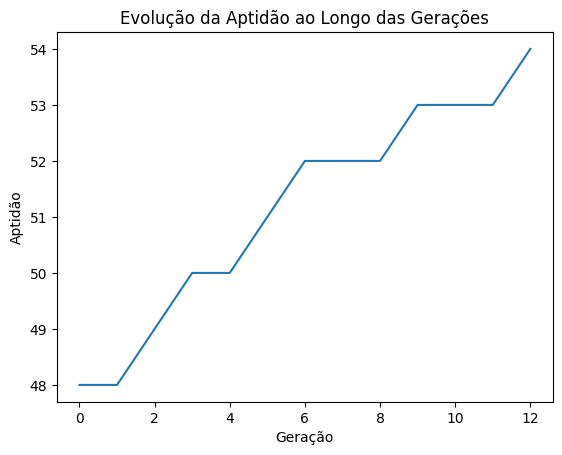

In [30]:
# Execução do algoritmo genético
generation = 0
population = generate_population()
aptidoes = []


while not print_found_goal(population) and generation < MAX_GENERATIONS:
    # Imprime informações da geração atual
    print(f'Geração: {generation}')
    print_found_goal(population)
    population = evolution(population)
    # Encontra a melhor solução da geração
    best_fitness = max(fitness_score(ind) for ind in population)
    aptidoes.append(best_fitness)
    generation += 1

# Visualização da evolução da aptidão ao longo das gerações
plt.plot(aptidoes)
plt.xlabel('Geração')
plt.ylabel('Aptidão')
plt.title('Evolução da Aptidão ao Longo das Gerações')
plt.show()


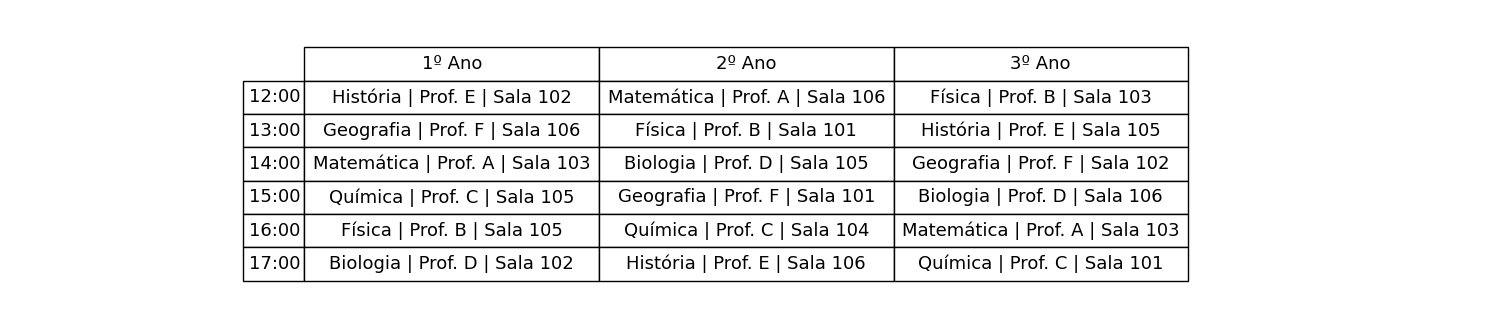

In [31]:
# Função para gerar a tabela final de horários
def generate_timetable(best_solution):
    horarios = [
        "12:00", "13:00", "14:00", "15:00", "16:00", "17:00"
    ]

    turmas = ["1º Ano", "2º Ano", "3º Ano"]

    tabela = pd.DataFrame("", index=horarios, columns=turmas)

    for idx, (horario_idx, sala) in enumerate(best_solution):
        horario = horarios[horario_idx]
        aula, turma, professor = aulas[idx]
        tabela.at[horario, turma] = f"{aula} | {professor} | {sala}"

    return tabela

# Encontrando a melhor solução e gerando a tabela de horários
best_solution = max(population, key=lambda ind: fitness_score(ind))
# Gera a tabela final
timetable = generate_timetable(best_solution)

# Plotando a tabela de horários
fig, ax = plt.subplots(figsize=(19, 4))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)
tabela = table(ax, timetable, loc='center', cellLoc='center', colWidths=[0.1]*len(timetable.columns))
tabela.auto_set_font_size(False)
tabela.set_fontsize(13)
tabela.scale(2, 2)

plt.show()


# Conclusão

Os resultados obtidos mostram uma evolução positiva na aptidão ao longo das gerações, conforme ilustrado no gráfico. A aptidão inicial começou em 46 e aumentou para 54, indicando que o algoritmo genético foi capaz de melhorar a qualidade das soluções de alocação de horários com o tempo.


A solução final apresentou uma pontuação de aptidão de 54, que é próxima do máximo teórico possível, considerando o número de aulas, turmas e salas disponíveis.

Ela atende às restrições básicas de:

*   Nenhuma sala sendo alocada para mais de uma aula ao mesmo tempo.
*   Nenhum professor sendo alocado para mais de uma aula ao mesmo tempo.
*   Nenhuma turma tendo mais de uma aula ao mesmo tempo.


Possíveis melhorias e trabalhos futuros

*   Mais restrições para a minimização de horários vagos para professores e turmas. Uma distribuição balanceada de horários para evitar que todas as aulas mais desafiadoras sejam alocadas em sequência.

*   Introduzir técnicas para garantir uma maior diversidade genética na população inicial e durante a evolução, como seleção de pais mais diversos ou introdução periódica de novos genes. Implementar uma taxa de mutação adaptativa que varie dependendo da geração ou da convergência da população, ajudando a evitar estagnação em ótimos locais.

Essas são algumas sugestões que podem ajudar a refinar o algoritmo e melhorar a qualidade das soluções geradas, tornando o sistema mais robusto e aplicável a uma variedade de cenários de alocação de horários.


